In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import torch

    # experiment_name = "Single Episode First Class Accuracy"
#     experiment_name = "First Class Accuracy"
    # experiment_name = "Single Episode Accuracy"
#     experiment_name = "Accuracy"
    # experiment_name = "Shot Accuracy"
#     experiment_name = "First Class Shot Accuracy"


#     PLOT_Ylabel = "First Class Accuracy%"
dpi = 200

In [2]:
def get_plot_info (dataset_name, experiment_name):

    if experiment_name == "Shot Accuracy" or experiment_name == "First Class Shot Accuracy":
        assert dataset_name == "MMM"

    if dataset_name == "MMM":
        fig_size = (15,15)
        if experiment_name == "Single Episode First Class Accuracy" or experiment_name == "First Class Accuracy":
            PLOT_Xlabel = 'Num. Classes'
            PLOT_legend_loc = 'center left'
            PLOT_Ylabel = 'Accuracy on 30-shot' 
            PLOT_title = 'Mini-Imagenet (First Class Accuracy)'
            Enable_Error_Bars = True
            
        if experiment_name == "Accuracy" or experiment_name == "Single Episode Accuracy":
            PLOT_Xlabel = 'Num. Classes'
            PLOT_legend_loc = 'upper right'
            PLOT_Ylabel = 'Accuracy on 30-shot' 
            PLOT_title = 'Mini-Imagenet (Average Accuracy)'
            Enable_Error_Bars = True
        
        if experiment_name == "Shot Accuracy":
            PLOT_Xlabel = 'Num. Shots'
            PLOT_legend_loc = 'center right'
            PLOT_Ylabel = 'Accuracy on 20-way' 
            PLOT_title = 'Mini-Imagenet (Average Accuracy)'
            Enable_Error_Bars = True
            
        if experiment_name == "First Class Shot Accuracy":
            PLOT_Xlabel = 'Num. Shots'
            PLOT_legend_loc = 'center right'
            PLOT_Ylabel = 'Accuracy on 20-way' 
            PLOT_title = 'Mini-Imagenet (First Class Accuracy)'
            Enable_Error_Bars = False         
            
    elif dataset_name == "OOO":
        fig_size = (15,15)
        if experiment_name == "Single Episode First Class Accuracy" or experiment_name == "First Class Accuracy":
            PLOT_Xlabel = 'Num. Classes'
            PLOT_legend_loc = 'center left'
            PLOT_Ylabel = 'Accuracy on 15-shot' 
            PLOT_title = 'Omniglot (First Class Accuracy)'
            Enable_Error_Bars = False
            
        if experiment_name == "Accuracy" or experiment_name == "Single Episode Accuracy":
            PLOT_Xlabel = 'Num. Classes'
            PLOT_legend_loc = 'lower left'
            PLOT_Ylabel = 'Accuracy on 15-shot' 
            PLOT_title = 'Omniglot (Average Accuracy)'
            Enable_Error_Bars = True
        

    return PLOT_Xlabel, PLOT_Ylabel, PLOT_title, PLOT_legend_loc, Enable_Error_Bars, fig_size


In [3]:
import seaborn as sns
sns.set_style('dark')
# sns.set_style('white')
sns.set_context('notebook', font_scale=2.3, rc={'lines.linewidth': 3.4})
# sns.set(rc={'figure.facecolor':'cornflowerblue'})
# sns.set(rc={'figure.facecolor':'cornflowerblue'})
sns.set_palette('bright')

sns.despine()

<Figure size 432x288 with 0 Axes>

In [4]:
name_to_path = {}
name_to_path['MMM'] = {"Prototypical":"../check/2021_05_26_08_13_44_imagenet_protonet_final/check_point_results.torch", 
                    "MAP-GeMCL":"../check/2021_05_25_20_53_25_imagenet_map_final/check_point_results.torch",  
                    "GeMCL":"../check/2021_05_25_16_38_30_imagenet_bayesian_final/check_point_results.torch",
        'PGLR':"../check/2021_05_28_02_13_36_imagenet_HRLR_final/check_point_results_new.torch",
        "OML":"OML_Paper_Original/DriveModels/Imagenet/OML_Imagenet.model_report.torch",
        "MTLR":"/SSD2/newhome/rasoulmrz/models/MTLR_Imagenet_results_new.torch"
                   }

name_to_path['OOO'] = {
        "Prototypical":"./content/2021_05_19_18_14_29_Omniglot_Protonet/check_point_results.torch",
                    "MAP-GeMCL":"./content/2021_05_20_00_32_32_Omniglot_MAP_100_1000/check_point_results.torch", 
                    "GeMCL":"./content/2021_05_19_21_38_39_Omniglot_Bayesian_100_1000/check_point_results.torch",
        "PGLR":"./content/2021_05_28_05_36_45_Omniglot_HRLR_final/check_point_results_new.torch",
        "OML":"OML_Paper_Original/DriveModels/Omniglot/OML_Omniglot.model_report.torch",
        "MTLR": "/SSD2/newhome/rasoulmrz/models/MTLR_Omniglot_results_new.torch",
        "ANML":"ANML/Neuromodulation_Model_Orig.net_report.torch"
        
    }
    

In [5]:
def get_continual_accs_from_single_episode(results, final_way, ways, shots, repeats):
    accs = {}
    for way in ways:
        acc = [(results[final_way][shots][r][way][0] == results[final_way][shots][r][way][1]).sum()/len (results[final_way][shots][r][way][1]) for r in range (repeats)]
        accs[way] = np.mean(acc), np.std(acc)
    return accs

def get_first_class_accs(results, ways, shots, repeats):
    accs = {}
    for way in ways:
        selector = (results[way][shots][0][way][1] == results[way][shots][0][way][1][0])
        acc = [(results[way][shots][r][way][0][selector] == results[way][shots][r][way][1][selector]).sum()/len (results[way][shots][r][way][1][selector]) for r in range (repeats)]
        accs[way] = np.mean(acc), np.std(acc)
    return accs


def get_first_class_accs_from_single_episode(results, final_way, ways, shots, repeats):
    accs = {}
    for way in ways:
        selector = (results[final_way][shots][0][way][1] == results[final_way][shots][0][way][1][0])
        acc = [(results[final_way][shots][r][way][0][selector] == results[final_way][shots][r][way][1][selector]).sum()/len (results[final_way][shots][r][way][1][selector]) for r in range (repeats)]
        accs[way] = np.mean(acc), np.std(acc)
    return accs

def get_continual_accs(results, ways, shots, repeats):
    accs = {}
    for way in ways:
        acc = [(results[way][shots][r][way][0] == results[way][shots][r][way][1]).sum()/len (results[way][shots][r][way][1]) for r in range (repeats)]
        accs[way] = np.mean(acc), np.std(acc)
    return accs

def get_shot_accs(results, way, shots, repeats):
    accs = {}
    for shot in shots:
        acc = [(results[way][shot][r][way][0] == results[way][shot][r][way][1]).sum()/len (results[way][shot][r][way][1]) for r in range (repeats)]
        accs[shot] = np.mean(acc), np.std(acc)
    return accs

def get_shot_accs_first_class(results, way, shots, repeats):
    accs = {}
    for shot in shots:
        selector = (results[way][shot][0][way][1] == results[way][shot][0][way][1][0])
        
        acc = [(results[way][shot][r][way][0][selector] == results[way][shot][r][way][1][selector]).sum()/len (results[way][shot][r][way][1][selector]) for r in range (repeats)]
        accs[shot] = np.mean(acc), np.std(acc)
    return accs


def get_accs(results, dataset_name , experiment_name):
    accs_report = {}
    
    repeats = 100
    if dataset_name == "OOO":
        way_keys = {10:[10], 50:[50], 100:[100], 150:[150], 200:[200], 250:[250], 300:[300], 350:[350], 400:[400], 450:[450], 
                    500:[500], 550:[550] , 600:[10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]}
        shot_keys = [15]
        repeats = len (results[600][15].keys())
    else:
        shot_keys = [5, 30, 60, 90, 120, 150, 180, 210, 240]
        way_keys = {5:[5],10:[10],15:[15],20:[5,10,15,20]}
        repeats = len (results[20][30].keys())
        
    
    if dataset_name == "OOO":
        if experiment_name == "Accuracy":
            return get_continual_accs(results, ways = list(way_keys.keys()) , shots = 15, repeats = repeats)
        if experiment_name == "Single Episode Accuracy":
            return get_continual_accs_from_single_episode(results, final_way = 600, ways = way_keys[600] , shots = 15, repeats = repeats)
        if experiment_name == "First Class Accuracy":
            return get_first_class_accs(results, ways = list(way_keys.keys()) , shots = 15, repeats = repeats)
        if experiment_name == "Single Episode First Class Accuracy":
            return get_first_class_accs_from_single_episode(results, final_way = 600, ways = way_keys[600] , shots = 15, repeats = repeats)
            
    else:
        if experiment_name == "Single Episode Accuracy":
            return get_continual_accs_from_single_episode(results, final_way = 20, ways = way_keys[20] , shots = 30, repeats = repeats)
        if experiment_name == "Accuracy":
            return get_continual_accs(results, ways = list(way_keys.keys()) , shots = 30, repeats = repeats)
        if experiment_name == "Shot Accuracy":
            return get_shot_accs(results, way = list(way_keys.keys())[-1], shots = shot_keys, repeats = repeats)
        if experiment_name == "Single Episode First Class Accuracy":
            return get_first_class_accs_from_single_episode(results, final_way = 20, ways = way_keys[20] , shots = 30, repeats = repeats)
        if experiment_name == "First Class Accuracy":
            return get_first_class_accs(results, ways = list(way_keys.keys()) , shots = 30, repeats = repeats)
        if experiment_name == "First Class Shot Accuracy":
            return get_shot_accs_first_class(results, way = list(way_keys.keys())[-1], shots = shot_keys, repeats = repeats)

In [6]:
from copy import deepcopy

def plot_subplots(dataset_name , experiment_name, name_to_path, datasets_to_remove = None):
 
    PLOT_Xlabel, PLOT_Ylabel, PLOT_title, PLOT_legend_loc, Enable_Error_Bars, fig_size = get_plot_info (dataset_name, experiment_name)
    plt.figure(figsize = fig_size)
    suffix_str = ""
    if datasets_to_remove != None:
        suffix_str = "no"
        name_to_path = deepcopy(name_to_path)
        for d in datasets_to_remove:
            del name_to_path[dataset_name][d]
            suffix_str += " ANML "
    for name,path in name_to_path[dataset_name].items():
        print (name)
        with open(path, 'rb') as handle:
            results = torch.load(handle)

        accs = get_accs(results, dataset_name , experiment_name)
        if name == "Protonet":
            print (accs)
        real_x = np.array(list (accs.keys()))
        x = real_x #range(0,len(real_x))
        y = 100 * np.array ([v[0] for k,v in accs.items()])
        yerr = 100 * np.array ([v[1] for k,v in accs.items()])
        if Enable_Error_Bars:
            plt.errorbar(x, y, linestyle=':', yerr=yerr, label=name, capsize = 3)
        else:
            plt.plot(x, y, label=name)

    plt.grid()
    # plt.xticks(range(len(real_x)), [str(a) for a in real_x])  # Set label locations.

    plt.legend(loc='best')
    plt.title(PLOT_title, fontweight='bold')
    plt.xlabel(PLOT_Xlabel)
    plt.ylabel(PLOT_Ylabel)

        
    plt.savefig(f'Images/{dataset_name}_{experiment_name}_{suffix_str}.png',  dpi=dpi)
    print ("saved in ", f'Images/{dataset_name}_{experiment_name}_{suffix_str}.png')

        

Prototypical
MAP-GeMCL
GeMCL
PGLR
MTLR
saved in  Images/OOO_Accuracy_no ANML  ANML .png


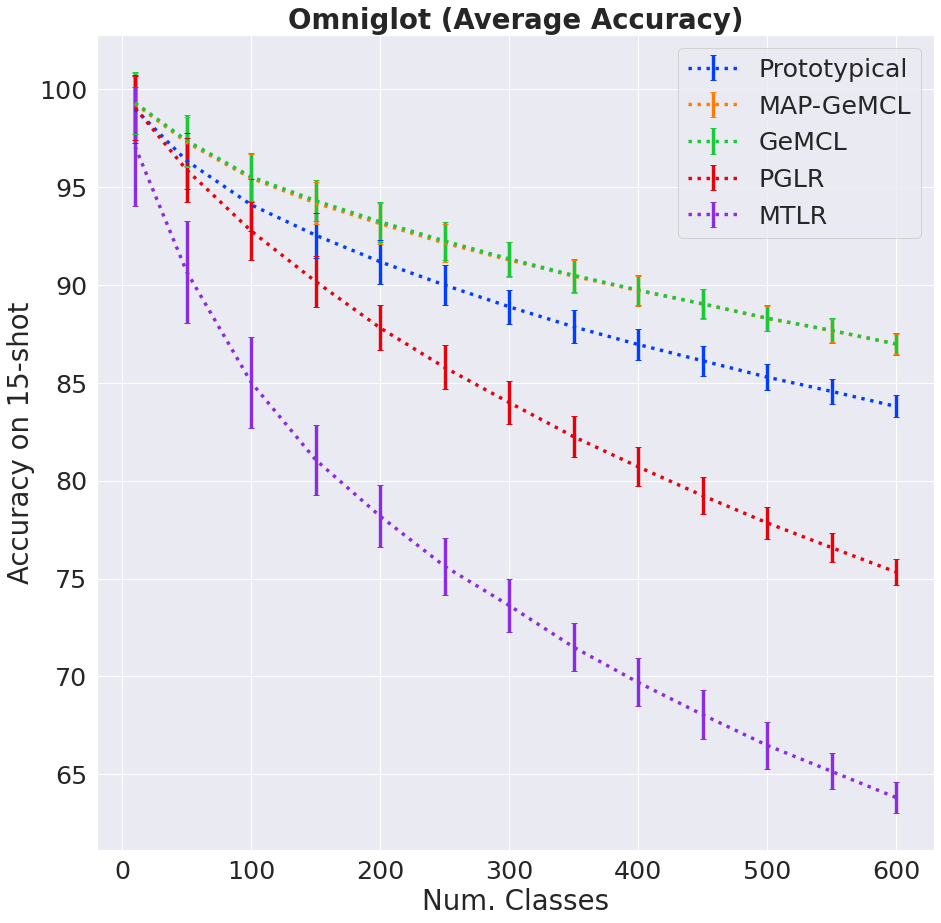

In [7]:
plot_subplots("OOO", "Accuracy", name_to_path = name_to_path, datasets_to_remove = ['ANML' , 'OML', 'MTLR'])

Prototypical
MAP-GeMCL
GeMCL
PGLR
OML
MTLR
ANML
saved in  Images/OOO_Accuracy_.png


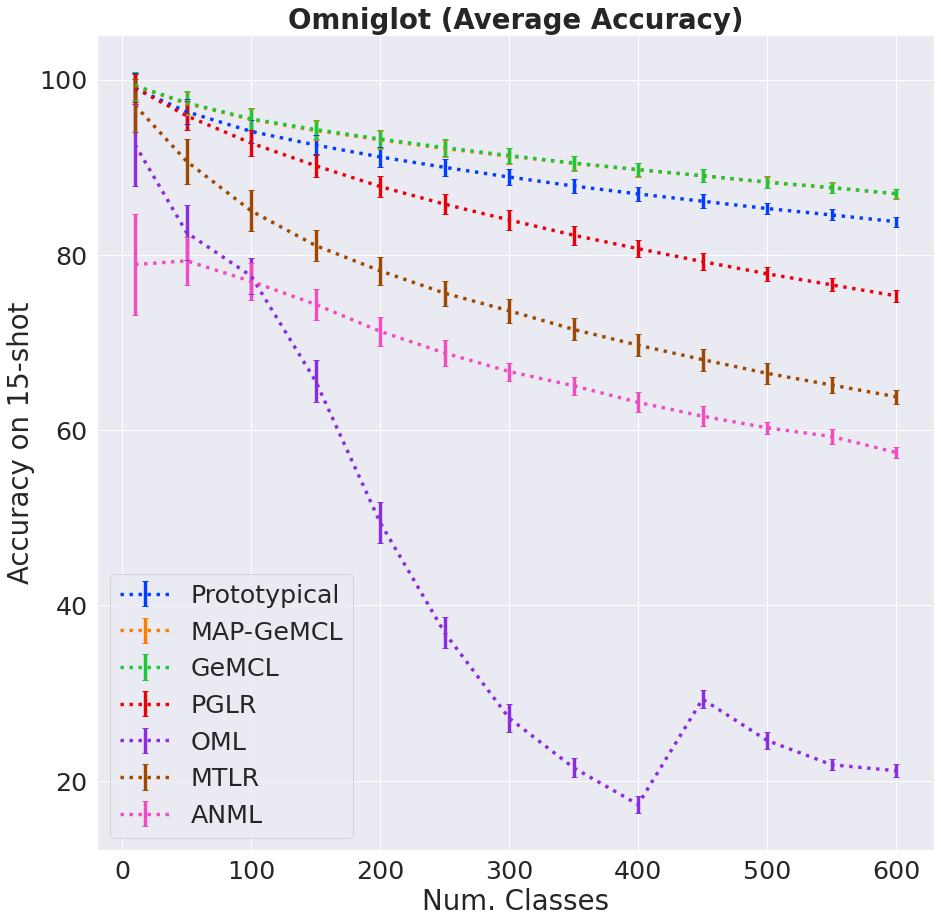

In [8]:
plot_subplots("OOO", "Accuracy", name_to_path = name_to_path)

Prototypical
MAP-GeMCL
GeMCL
PGLR
OML
MTLR
ANML
saved in  Images/OOO_First Class Accuracy_.png


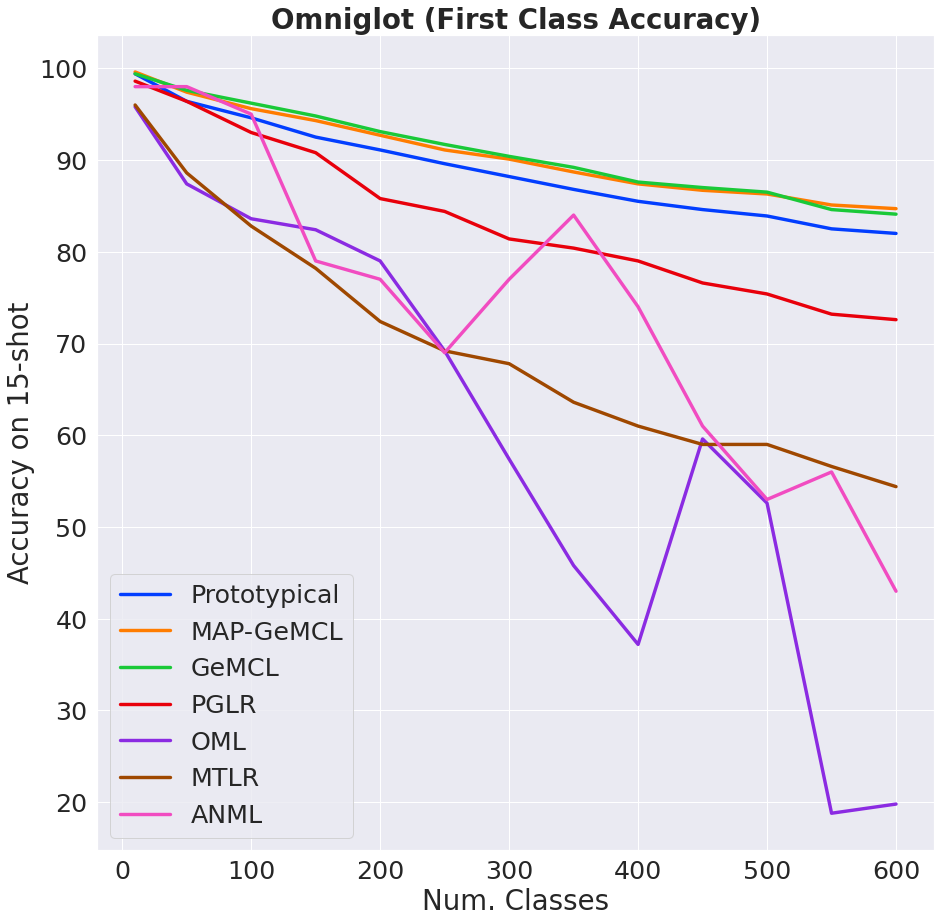

In [9]:
plot_subplots("OOO", "First Class Accuracy", name_to_path = name_to_path)

Prototypical
MAP-GeMCL
GeMCL
PGLR
OML
MTLR
ANML
saved in  Images/OOO_Single Episode First Class Accuracy_.png


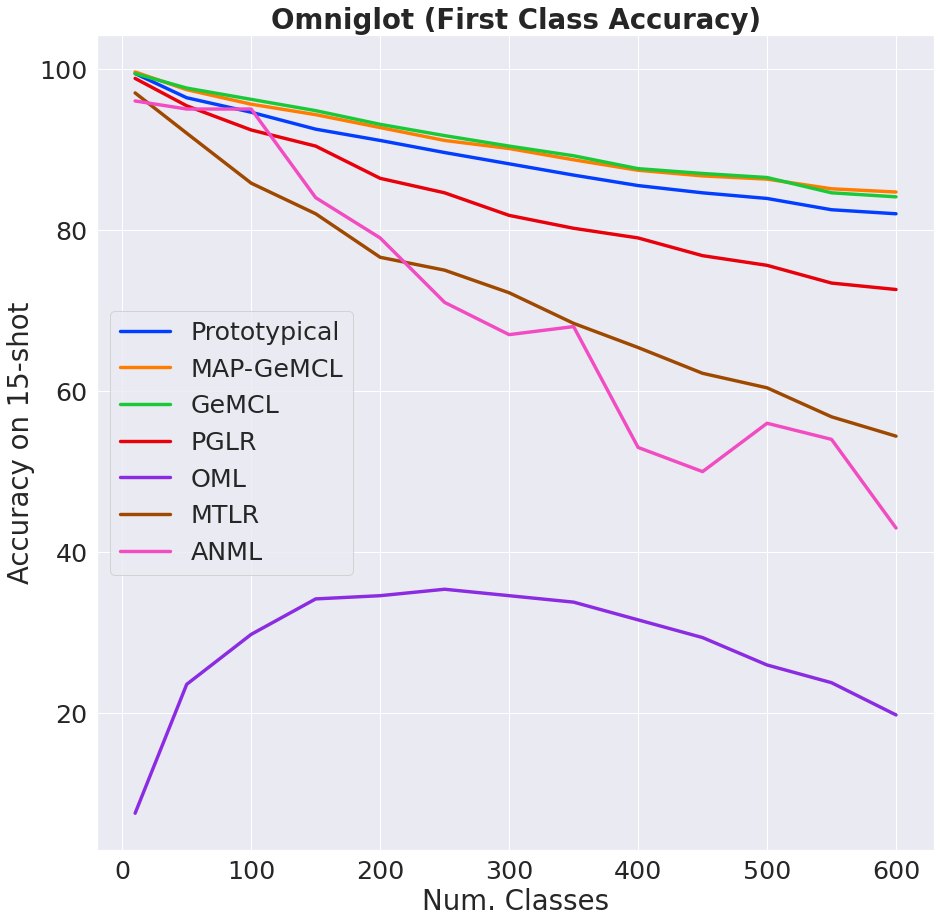

In [10]:
plot_subplots("OOO", "Single Episode First Class Accuracy", name_to_path = name_to_path)

Prototypical
MAP-GeMCL
GeMCL
PGLR
OML
MTLR
saved in  Images/MMM_First Class Shot Accuracy_.png


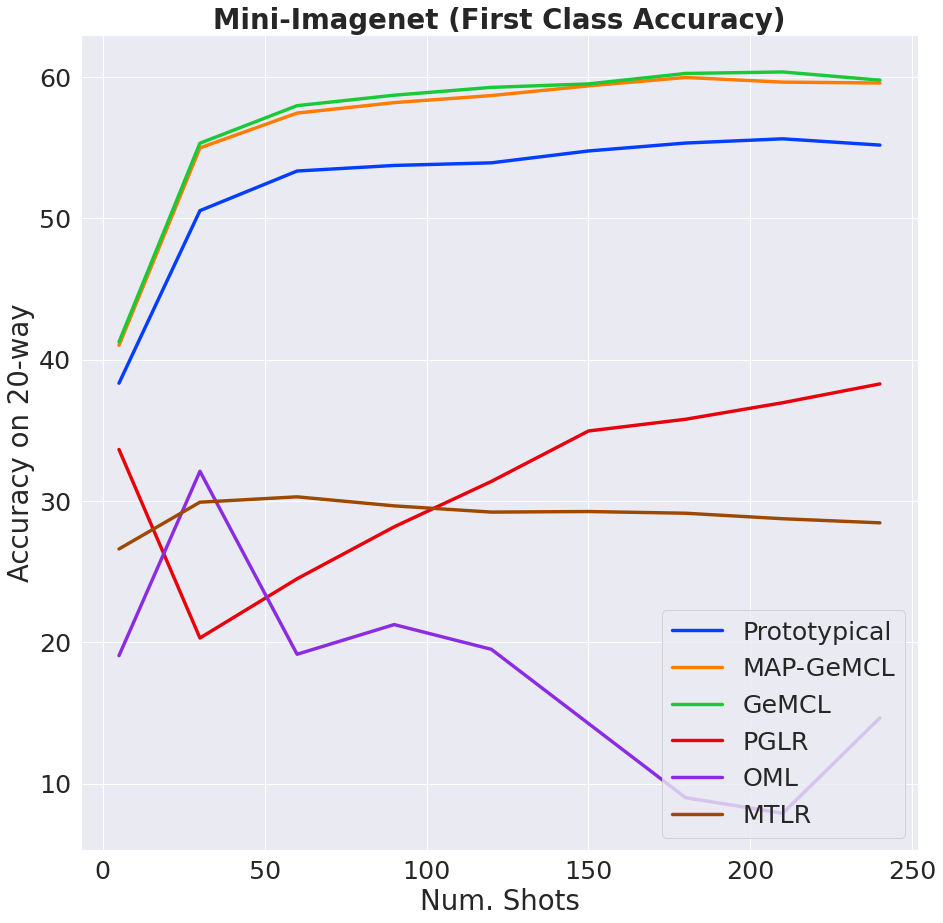

In [11]:
plot_subplots("MMM", "First Class Shot Accuracy", name_to_path = name_to_path)

Prototypical
MAP-GeMCL
GeMCL
PGLR
OML
MTLR
saved in  Images/MMM_Shot Accuracy_.png


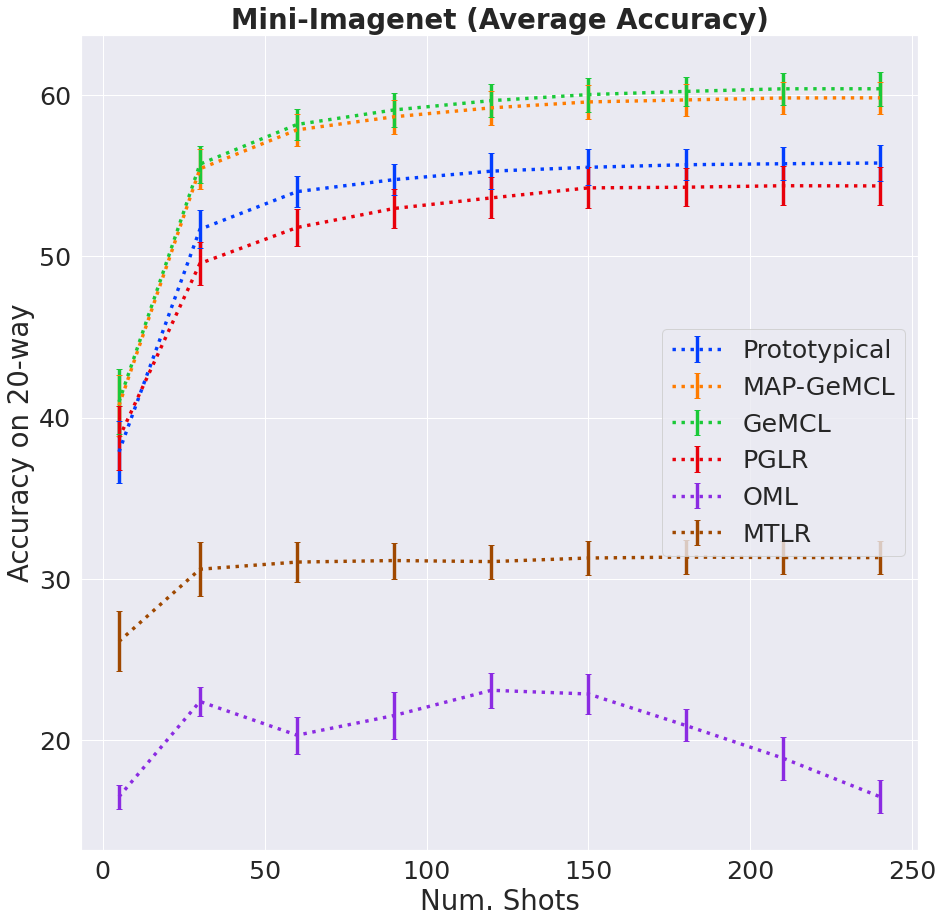

In [12]:
plot_subplots("MMM", "Shot Accuracy", name_to_path = name_to_path)

Prototypical
MAP-GeMCL
GeMCL
PGLR
OML
MTLR
saved in  Images/MMM_Accuracy_.png


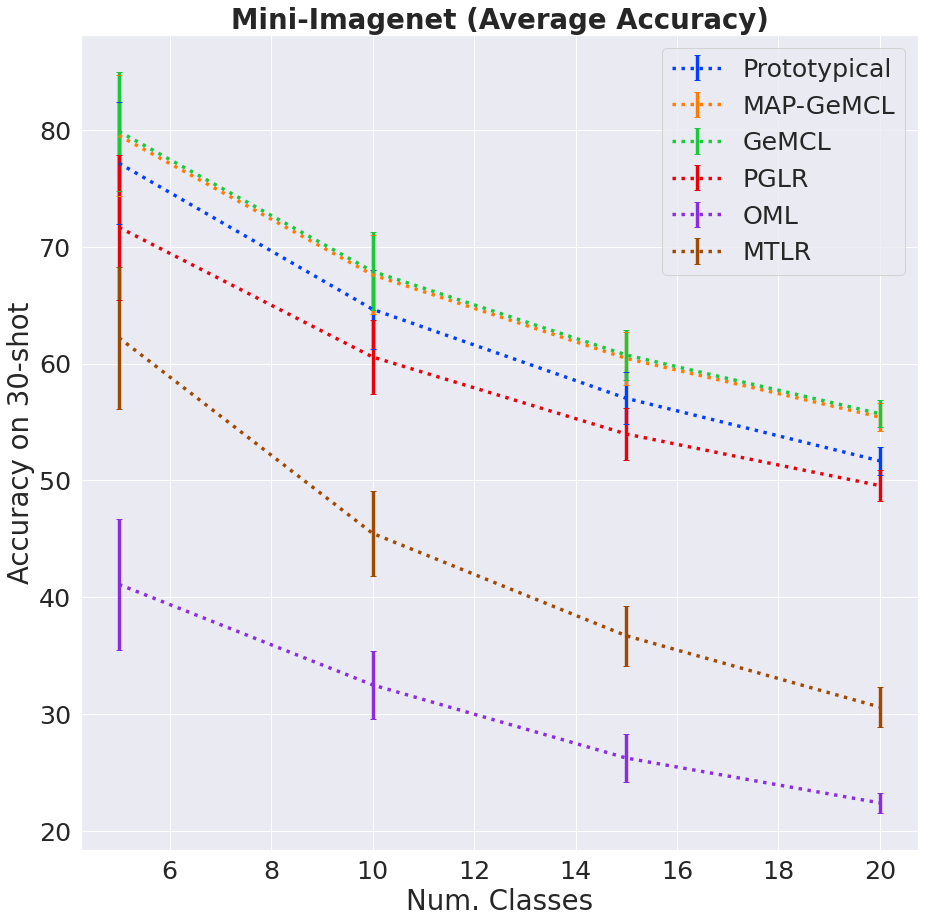

In [13]:
plot_subplots("MMM", "Accuracy", name_to_path = name_to_path)